In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


In [13]:
df = pd.read_csv(r"C:\Users\sumit\Downloads\lab_session.csv")
df = df.dropna(axis = 1)
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [14]:
A = df.iloc[:, 1:-1].values
B =df.iloc[:, -1].values

A = np.array(A)
B = np.array(B)

print("Matrix A :")
print(A)
print("Matrix B :")
print(B)

# number of vectors
noOfVector = A.shape[0]
print('Number of vector is : ', noOfVector)


# Dimensionality
DimensionalityOfA = A.shape[1]
DimensionalityOfB = A.shape[1]
print("Dimensionality of A is" , DimensionalityOfA)
print("Dimensionality of B is" , DimensionalityOfB)



Matrix A :
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix B :
[386 289 393 110 280 167 271 274 148 198]
Number of vector is :  10
Dimensionality of A is 3
Dimensionality of B is 3


In [15]:
rank = np.linalg.matrix_rank(A)
print("Rank of matrix A is", rank)

Rank of matrix A is 3


In [16]:
# Using Pseudo-Inverse find the cost of each product available for sale.
# (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
# pseudo-inverse.)

pseudoInverse = np.linalg.pinv(A)
priceOfEachProduct = pseudoInverse.dot(B)
priceOfEachProduct = np.array(priceOfEachProduct)
print(priceOfEachProduct)

[ 1. 55. 18.]


In [17]:
# . Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
# available with the vendor.

X = np.dot(pseudoInverse, B)
print(X)

[ 1. 55. 18.]


In [18]:
df['Category'] = df['Payment (Rs)'] > 200
df['Category'] = df['Category'].replace({True:'RICH', False: 'POOR'})

features = df.iloc[:, 1:-2].values
X_train, X_test, y_train, y_test = train_test_split(features, df['Category'], test_size=0.2, random_state=0)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
df

Accuracy:  1.0


,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Category
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


In [21]:
from sklearn.preprocessing import LabelEncoder

# Example conversion of string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the encoder on the actual data and transform both y_test and y_pred
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)



In [23]:

# Now calculate the MSE
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
print(f"Mean Squared Error : {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_encoded, y_pred_encoded)
print(f"Mean Absolute Percentage Error: {mape * 100:.2f}%")

# Calculate R² score
r2 = r2_score(y_test_encoded, y_pred_encoded)
print(f"R² score: {r2}")


Mean Squared Error : 0.0
Root Mean Squared Error: 0.0
Mean Absolute Percentage Error: 0.00%
R² score: 1.0


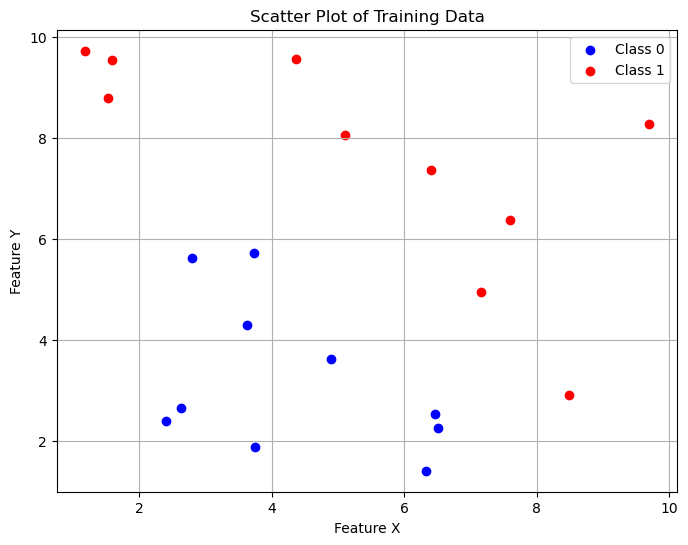

In [26]:
#  Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary
# randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -
# Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class
# color. Observe the plot.
# Set random seed for reproducibility
np.random.seed(42)

# Generate 20 data points with 2 features (X & Y) between 1 and 10
data_points = np.random.uniform(1, 10, size=(20, 2))

# Assign classes based on some condition, here we will assign class1 (Red) if the sum of X and Y is greater than 10, else class0 (Blue)
labels = np.array([1 if x[0] + x[1] > 10 else 0 for x in data_points])

# Separate the points by class for plotting
class0_points = data_points[labels == 0]
class1_points = data_points[labels == 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1')
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid(True)
plt.show()

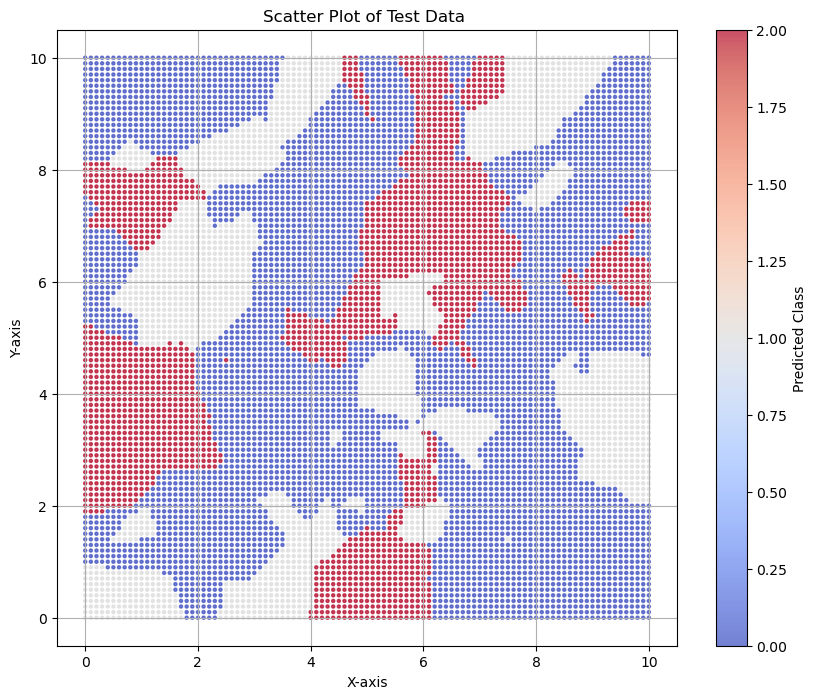

In [27]:
# Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
# This creates a test set of about 10,000 points. Classify these points with above training data using
# kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their
# predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread
# and class boundary lines in the feature space.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Example training data (replace these with your actual data)
# Simulated data for demonstration purposes
np.random.seed(0)  # For reproducibility
data_array = np.random.rand(100, 2) * 10  # 100 points in 2D space
actual_labels = np.random.choice(['Statement', 'Answer', 'Question'], 100)  # Random labels

# Encode labels to numbers (for kNN classifier)
label_map = {'Statement': 0, 'Answer': 1, 'Question': 2}
encoded_labels = np.array([label_map[label] for label in actual_labels])

# Train kNN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data_array, encoded_labels)

# Generate test set data
x = np.arange(0, 10.1, 0.1)
y = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x, y)  #meshgrid(x, y) is used to generate coordinate matrices from two 1D arrays representing the Cartesian coordinates of a grid.
X_test = X_test.ravel() #raven converts multi-dimensional arrays (like 2D or 3D arrays) into 1D arrays.
Y_test = Y_test.ravel()
test_data = np.column_stack((X_test, Y_test))

# Classify test set data
predicted_labels = knn.predict(test_data)

# Decode predicted labels back to original class names
reverse_label_map = {0: 'Statement', 1: 'Answer', 2: 'Question'}
decoded_predicted_labels = np.array([reverse_label_map[label] for label in predicted_labels])

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test, Y_test, c=predicted_labels, cmap='coolwarm', s=5, alpha=0.7)
plt.colorbar(scatter, label='Predicted Class')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Test Data ')
plt.grid(True)
plt.show()
